# Esercizio

Si dispone di  un dataset in cui alcuni vini sono stati classificati (classe 1, 2 o 3) a seconda delle loro caratteristiche (Alcohol, Malic acid, Ash, Alcalinity of ash, Magnesium, Total phenols, Flavanoids, Nonflavanoid phenols, Proanthocyanins, Color intensity, Hue, OD280/OD315, Proline).

__Creare un modello K-NN e dire a quale classe appartiene il vino con le seguenti caratteristiche__:

In [1]:
from tabulate import tabulate

info = ['Alcohol', 'MA', 'Ash', 'AA', 'Magnesium', 'TP', 'Flavanoids', 'NF', 'PAc', 'CI', 'Hue', 'OD280/OD315', 'Proline']
daScoprire = [12.37, 1.07, 2.1, 18.5, 88, 3.52, 3.75, .24, 1.95, 4.5, 1.04, 2.77, 660] 
print(tabulate([daScoprire], headers=info))

  Alcohol    MA    Ash    AA    Magnesium    TP    Flavanoids    NF    PAc    CI    Hue    OD280/OD315    Proline
---------  ----  -----  ----  -----------  ----  ------------  ----  -----  ----  -----  -------------  ---------
    12.37  1.07    2.1  18.5           88  3.52          3.75  0.24   1.95   4.5   1.04           2.77        660


_(Istruzioni: in ogni casella di codice, scrivere le istruzioni corrispondenti al commento. Si suggerisce di fare una copia di questo file in modo da avere sempre i risultati corretti a disposizione, visto che ad ogni esecuzione gli output vengono ricalcolati)_

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# importiamo Pandas e il dataframe dal file data/wine.csv
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML 101.1/data/wine.csv')

In [4]:
# visualizziamo il dataframe
df

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [5]:
# visualizziamo il numero di vini per ogni classe
print(df.groupby('Class').size())

Class
1    59
2    71
3    48
dtype: int64


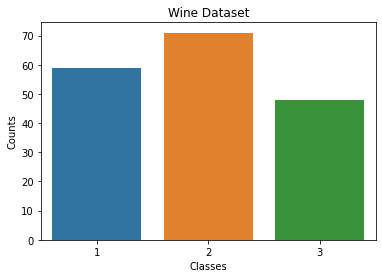

In [6]:
# per maggior chiarezza, visualizziamo anche il grafico delle classi dei vini
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt


sns.countplot(x="Class", data=df)
plt.title("Wine Dataset")
plt.xlabel("Classes")
plt.ylabel("Counts")
plt.show()

In [9]:
# traformiamo il dataframe in una matrice numpy e separiamo il target (la classe, prima colonna, che chiamiamo y)
# dal resto dei dati (le osservazioni, che chiameremo x)
import numpy as np
dfnp = df.to_numpy()

# dfnp[startrow:endrow, column]
x=dfnp[:,1:] # prendiamo tutti i dati tranne la prima colonna, osservazioni
y=dfnp[:,0] # prendiamo solo la prima colonna, target classe

In [10]:
# vediamo i dati presenti in x e y
print(x[:10])
print(f'y = {y[:10]}')

[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]
 [1.420e+01 1.760e+00 2.450e+00 1.520e+01 1.120e+02 3.270e+00 3.390e+00
  3.400e-01 1.970e+00 6.750e+00 1.050e+00 2.850e+00 1.450e+03]
 [1.439e+01 1.870e+00 2.450e+00 1.460e+01 9.600e+01 2.500e+00 2.520e+00
  3.000e-01 1.980e+00 5.250e+00 1.020e+00 3.580e+00 1.290e+03]
 [1.406e+01 2.150e+00 2.610e+00 1.760e+01 1.210e+02 2.6

In [ ]:
# ora contiamo le classi che sono presenti nella y per vedere se corrispondono a quanto trovato nel dataframe
# Print class frequencies through collections counter
import collections
collections.Counter(y)

Counter({1.0: 59, 2.0: 71, 3.0: 48})

In [19]:
#suddividiamo ora i dati in due dataset, uno per 'allenare' il metodo (training set) 
# e l'altro per testarne l'efficacia (test set). Facciamo in modo che il training set sia il 70% del totale

from sklearn.model_selection import train_test_split # suddivide le osservazioni nei due insiemi

X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.30, # by default is 75%-25%
                                                    # shuffle is set True by default,
                                                    stratify = y, # per mantenere le proporzioni che ci sono nei dati di partenza
                                                    random_state = 123) # fix random seed for replicability

In [20]:
# visualizziamo gli shape dei vari dataset X_train, X_test, y_train e y_test
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((124, 13), (124,), (54, 13), (54,))

In [18]:
# visualizziamo anche le prime 10 righe dell'X_train e dell'y_train per vedere i dati
# eliminiamo la dotazine scientifica per comodità di lettura
np.set_printoptions(suppress=True)
print(x[:10])
print(f'y = {y[:10]}')

[[  14.23    1.71    2.43   15.6   127.      2.8     3.06    0.28    2.29
     5.64    1.04    3.92 1065.  ]
 [  13.2     1.78    2.14   11.2   100.      2.65    2.76    0.26    1.28
     4.38    1.05    3.4  1050.  ]
 [  13.16    2.36    2.67   18.6   101.      2.8     3.24    0.3     2.81
     5.68    1.03    3.17 1185.  ]
 [  14.37    1.95    2.5    16.8   113.      3.85    3.49    0.24    2.18
     7.8     0.86    3.45 1480.  ]
 [  13.24    2.59    2.87   21.    118.      2.8     2.69    0.39    1.82
     4.32    1.04    2.93  735.  ]
 [  14.2     1.76    2.45   15.2   112.      3.27    3.39    0.34    1.97
     6.75    1.05    2.85 1450.  ]
 [  14.39    1.87    2.45   14.6    96.      2.5     2.52    0.3     1.98
     5.25    1.02    3.58 1290.  ]
 [  14.06    2.15    2.61   17.6   121.      2.6     2.51    0.31    1.25
     5.05    1.06    3.58 1295.  ]
 [  14.83    1.64    2.17   14.     97.      2.8     2.98    0.29    1.98
     5.2     1.08    2.85 1045.  ]
 [  13.86    1.35  

In [21]:
# importiamo il metodo di classificazione K-NN
from sklearn.neighbors import KNeighborsClassifier

In [22]:
# inizializziamo il metodo con n_neighbors=5
neigh = KNeighborsClassifier(n_neighbors=5)

In [23]:
# "alleniamo" il metodo con i dati del training set
neigh.fit(X_train, y_train)

KNeighborsClassifier()

In [24]:
# proviamo a fare una previsione sui dati del test set
predict = neigh.predict(X_test)

In [25]:
# e visualizziamo il risultato (solo i primi dieci vini)
print(f'dati predetti dal metodo =                {predict[:10]}')
print(f'dati reali presenti nel dataset di test = {y_test[:10]}')

dati predetti dal metodo =                [3. 1. 1. 2. 1. 1. 1. 2. 2. 3.]
dati reali presenti nel dataset di test = [1. 1. 1. 2. 1. 1. 1. 2. 3. 2.]


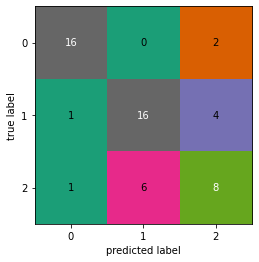

In [27]:
# valutiamo il nostro metodo: più o meno accurato, qualche errore

# visualizziamo la confusion matrix
from mlxtend.plotting import plot_confusion_matrix
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

plot_confusion_matrix(confusion_matrix(y_test, predict), cmap=plt.cm.Dark2)
plt.show()

In [ ]:
# perché questa volta la matrice è una matrice 3x3?
# risposta: perché il target (classe) ha tre valori possibili

In [ ]:
# prendendo in considerazione i vini di classe 3, quanto valgono TP, FP, FN e TN?
# TP = 8
# FP = 6
# FN = 7
# TN = 33

In [ ]:
# sulla base della confusion matrix, cosa possiamo dire di questo metodo? Motivare la risposta
# risposta: è accurato ma non molto visto che ci sono tanti falsi positivi e falsi negativi

In [29]:
# visualizziamo adesso gli indicatori
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

         1.0       0.89      0.89      0.89        18
         2.0       0.73      0.76      0.74        21
         3.0       0.57      0.53      0.55        15

    accuracy                           0.74        54
   macro avg       0.73      0.73      0.73        54
weighted avg       0.74      0.74      0.74        54



In [ ]:
# sulla base degli indicatori, che cosa possiamo dire del nostro metodo? Motivare la risposta
# risposta: è accurato al 74% (non molto)

In [30]:
# proviamo a determinare adesso la classe del vino di cui abbiamo avuto le caratteristiche all'inizio dell'esercizio
daScoprire = [[12.37, 1.07, 2.1, 18.5, 88, 3.52, 3.75, .24, 1.95, 4.5, 1.04, 2.77, 660]]
predictVino = neigh.predict(daScoprire)
predictVino

array([3.])

In [ ]:
# a quale classe appartiene questo vino (= come viene classificato questo vino dal metodo)?
# risposta: classe 3

In [33]:
# il vino che abbiamo testato in realtà è uno di quelli già presenti nel dataset. 
# Provate ad andare a vedere nel dataframe Pandas se la predizione del metodo è corretta o meno
# cercando alcune caratteristiche del nostro vino, ad esempio 'Alcohol' = 12.37, 'Ash' = 2.10 e 'Magnesium' = 88
df[(df['Alcohol'] == 12.37) & (df['Ash'] == 2.10) & (df['Magnesium'] == 88)]

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
98,2,12.37,1.07,2.1,18.5,88,3.52,3.75,0.24,1.95,4.5,1.04,2.77,660


In [ ]:
# a quale classe appartiene questo vino?
# risposta: classe 2